(502, 1040, 3)
(502, 1040)


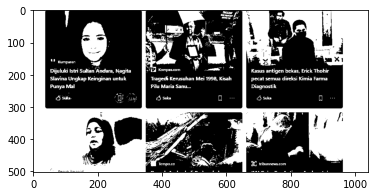

True

In [49]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

imgdata = mpimg.imread('img2.jpg')
print(imgdata.shape)
# convert to grayscale
# gray = 0.2989 * imgdata[:, :, 0] + 0.5870 * imgdata[:, :, 1] + 0.1140 * imgdata[:, :, 2]
gray = imgdata[:, :, 0]
print(gray.shape)
plt.imshow(gray, cmap='gray')
# conver gray to binary
thresh = 0.5 * (np.max(gray) + np.min(gray))
binary = np.where(gray > thresh, 1, 0)
plt.imshow(binary, cmap='gray')
plt.show()
mpimg.imsave('img2_binary.jpg', binary, cmap='gray')
# find lines in image using opencv
import cv2
import math

img = cv2.imread("img2.jpg")
result = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
# Detect horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
detect_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detect_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (36,255,12), 2)
# Detect vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,10))
detect_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(detect_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (36,255,12), 2)
cv2.imwrite("img21.png", result)